<a href="https://colab.research.google.com/github/eman-kom/tensorflow-fundamentals/blob/main/05_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-06-12 03:54:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-12 03:54:45 (78.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent")

--2022-06-12 03:54:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   266MB/s    in 0.6s    

2022-06-12 03:54:48 (266 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=32
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=32
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(
    include_top=False
)

base_model.trainable = False
inputs = Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")]
)

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220612-035458
Epoch 1/5
24/24 [==============================] - 33s 264ms/step - loss: 1.8824 - accuracy: 0.4240 - val_loss: 1.3595 - val_accuracy: 0.6941
Epoch 2/5
24/24 [==============================] - 5s 193ms/step - loss: 1.1427 - accuracy: 0.7587 - val_loss: 0.9156 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 4s 169ms/step - loss: 0.8311 - accuracy: 0.8067 - val_loss: 0.7700 - val_accuracy: 0.8125
Epoch 4/5
24/24 [==============================] - 5s 209ms/step - loss: 0.6834 - accuracy: 0.8347 - val_loss: 0.6490 - val_accuracy: 0.8322
Epoch 5/5
24/24 [==============================] - 5s 194ms/step - loss: 0.5825 - accuracy: 0.8667 - val_loss: 0.6210 - val_accuracy: 0.8388


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.6032 - accuracy: 0.8424


[0.6032443642616272, 0.8424000144004822]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


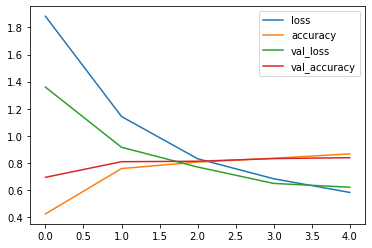

In [ ]:
import pandas as pd
pd.DataFrame(history_10_percent.history).plot()

In [ ]:
input_shape = (1, 4, 4, 3)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: {input_tensor.shape}")

global_avg_pooled_tensor = GlobalAveragePooling2D()(input_tensor)
print(f"Global Average Pooled 2D: {global_avg_pooled_tensor.shape}")

Random input tensor: (1, 4, 4, 3)
Global Average Pooled 2D: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2]) == global_avg_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=bool, numpy=array([[ True,  True,  True]])>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2022-06-12 03:56:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 142.250.152.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   126MB/s    in 1.0s    

2022-06-12 03:56:13 (126 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There a

In [ ]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32
)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_percent,
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name="data_augmentation")

In [ ]:
# model 1 feature extraction

input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")]
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220612-035618
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.4169 - accuracy: 0.1286 - val_loss: 2.3201 - val_accuracy: 0.1118
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1733 - accuracy: 0.2286 - val_loss: 2.1897 - val_accuracy: 0.1546
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 2.0340 - accuracy: 0.3143 - val_loss: 2.0958 - val_accuracy: 0.2253
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8717 - accuracy: 0.4143 - val_loss: 2.0049 - val_accuracy: 0.2747
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.7118 - accuracy: 0.5714 - val_loss: 1.9238 - val_accuracy: 0.3388


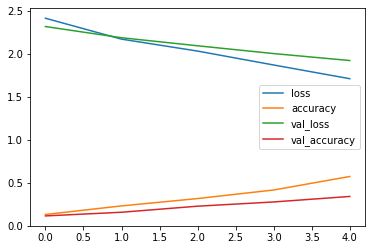

In [ ]:
pd.DataFrame(history_1_percent.history).plot()

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_2d")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_2d (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    save_freq="epoch",
    verbose=1
)

In [ ]:
initial_epochs = 5

model_2_history = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[checkpoint_callback, create_tensorboard_callback("transfer_learning", "10_percent_data_aug")]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220612-035653
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0474 - accuracy: 0.2907
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 542ms/step - loss: 2.0474 - accuracy: 0.2907 - val_loss: 1.5664 - val_accuracy: 0.5757
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.6320
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 417ms/step - loss: 1.3983 - accuracy: 0.6320 - val_loss: 1.1130 - val_accuracy: 0.7418
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0808 - accuracy: 0.7213
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 388ms/step - loss: 1.0808 - accuracy: 0.7213 - val_loss: 0.8978 - val_accuracy: 0.7829
Epoc

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.6032 - accuracy: 0.8424


[0.6032443642616272, 0.8424000144004822]

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 116ms/step - loss: 1.9283 - accuracy: 0.3424


[1.9283050298690796, 0.3424000144004822]

In [ ]:
model_2_run = model_2.evaluate(test_data)

79/79 [==============================] - 9s 99ms/step - loss: 0.6984 - accuracy: 0.8148


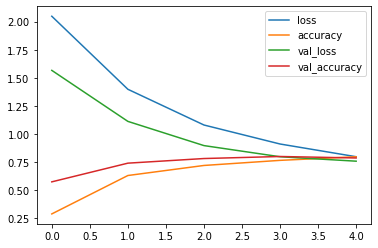

In [ ]:
pd.DataFrame(model_2_history.history).plot()

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 8s 92ms/step - loss: 0.6984 - accuracy: 0.8148


In [ ]:
loaded_weights_model_results == model_2_run # error cos precision too close but not equal

False

In [ ]:
model_2.layers

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001/10),
    metrics=["accuracy"]
)


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_tune = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    initial_epoch=model_2_history.epoch[-1],
    callbacks=[create_tensorboard_callback("transfer_learning", "fine_tuning"), checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/fine_tuning/20220612-035858
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7030 - accuracy: 0.7973
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 456ms/step - loss: 0.7030 - accuracy: 0.7973 - val_loss: 0.6116 - val_accuracy: 0.7911
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.5606 - accuracy: 0.8333
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 358ms/step - loss: 0.5606 - accuracy: 0.8333 - val_loss: 0.5706 - val_accuracy: 0.8043
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8520
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 428ms/step - loss: 0.4832 - accuracy: 0.8520 - val_loss: 0.5475 - val_accuracy: 0.8076
Epoch 8/10

In [ ]:
import matplotlib.pyplot as plt

def compare_histories(original, extended, initial_epochs=5):
    total_acc = original.history["accuracy"] + extended.history["accuracy"]
    total_loss = original.history["loss"] + extended.history["loss"]

    total_val_acc = original.history["val_accuracy"] + extended.history["val_accuracy"]
    total_val_loss = original.history["val_loss"] + extended.history["val_loss"]

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label="Training Accuracy")
    plt.plot(total_val_acc, label="Validation Accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label="Training Loss")
    plt.plot(total_val_loss, label="Validation Loss")
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Loss")

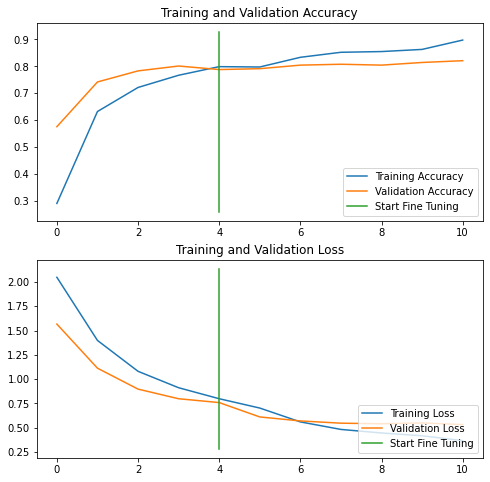

In [ ]:
compare_histories(model_2_history, history_fine_tune, 5)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

walk_through_dir("10_food_classes_all_data")

--2022-06-12 04:00:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.146.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   154MB/s    in 3.2s    

2022-06-12 04:00:34 (154 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_clas

In [ ]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_all_data,
    label_mode="categorical",
    image_size=(224, 224)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=(224, 224)
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_avg_pooling_2d True
4 output_layer True


In [ ]:
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(
    train_data_10_classes_full,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    initial_epoch=history_10_percent.epoch[-1],
    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_all_data"), checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_all_data/20220612-041748
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.7808
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 59s 224ms/step - loss: 0.6703 - accuracy: 0.7808 - val_loss: 0.4343 - val_accuracy: 0.8520
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.8235
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 48s 203ms/step - loss: 0.5568 - accuracy: 0.8235 - val_loss: 0.3917 - val_accuracy: 0.8586
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.5049 - accuracy: 0.8359
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 44s 183ms/step - loss: 0.5049 - accuracy: 0.8359 - val_loss: 0.3769 - 